## Waste Management Using CNN Model

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 22.4MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [5]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Activation,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
#visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:03<00:00, 2510.74it/s]


In [7]:
data.shape

(22564, 2)

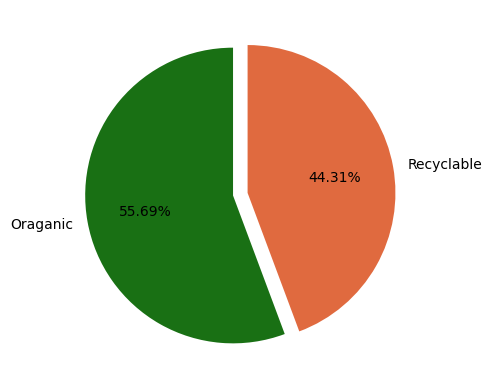

In [8]:
colors = ['#197014','#e06a3f']
plt.pie(data.label.value_counts(),labels = ['Oraganic','Recyclable'],autopct= '%0.2f%%',
        colors = colors, startangle=90,explode=[0.05,0.05])
plt.show()

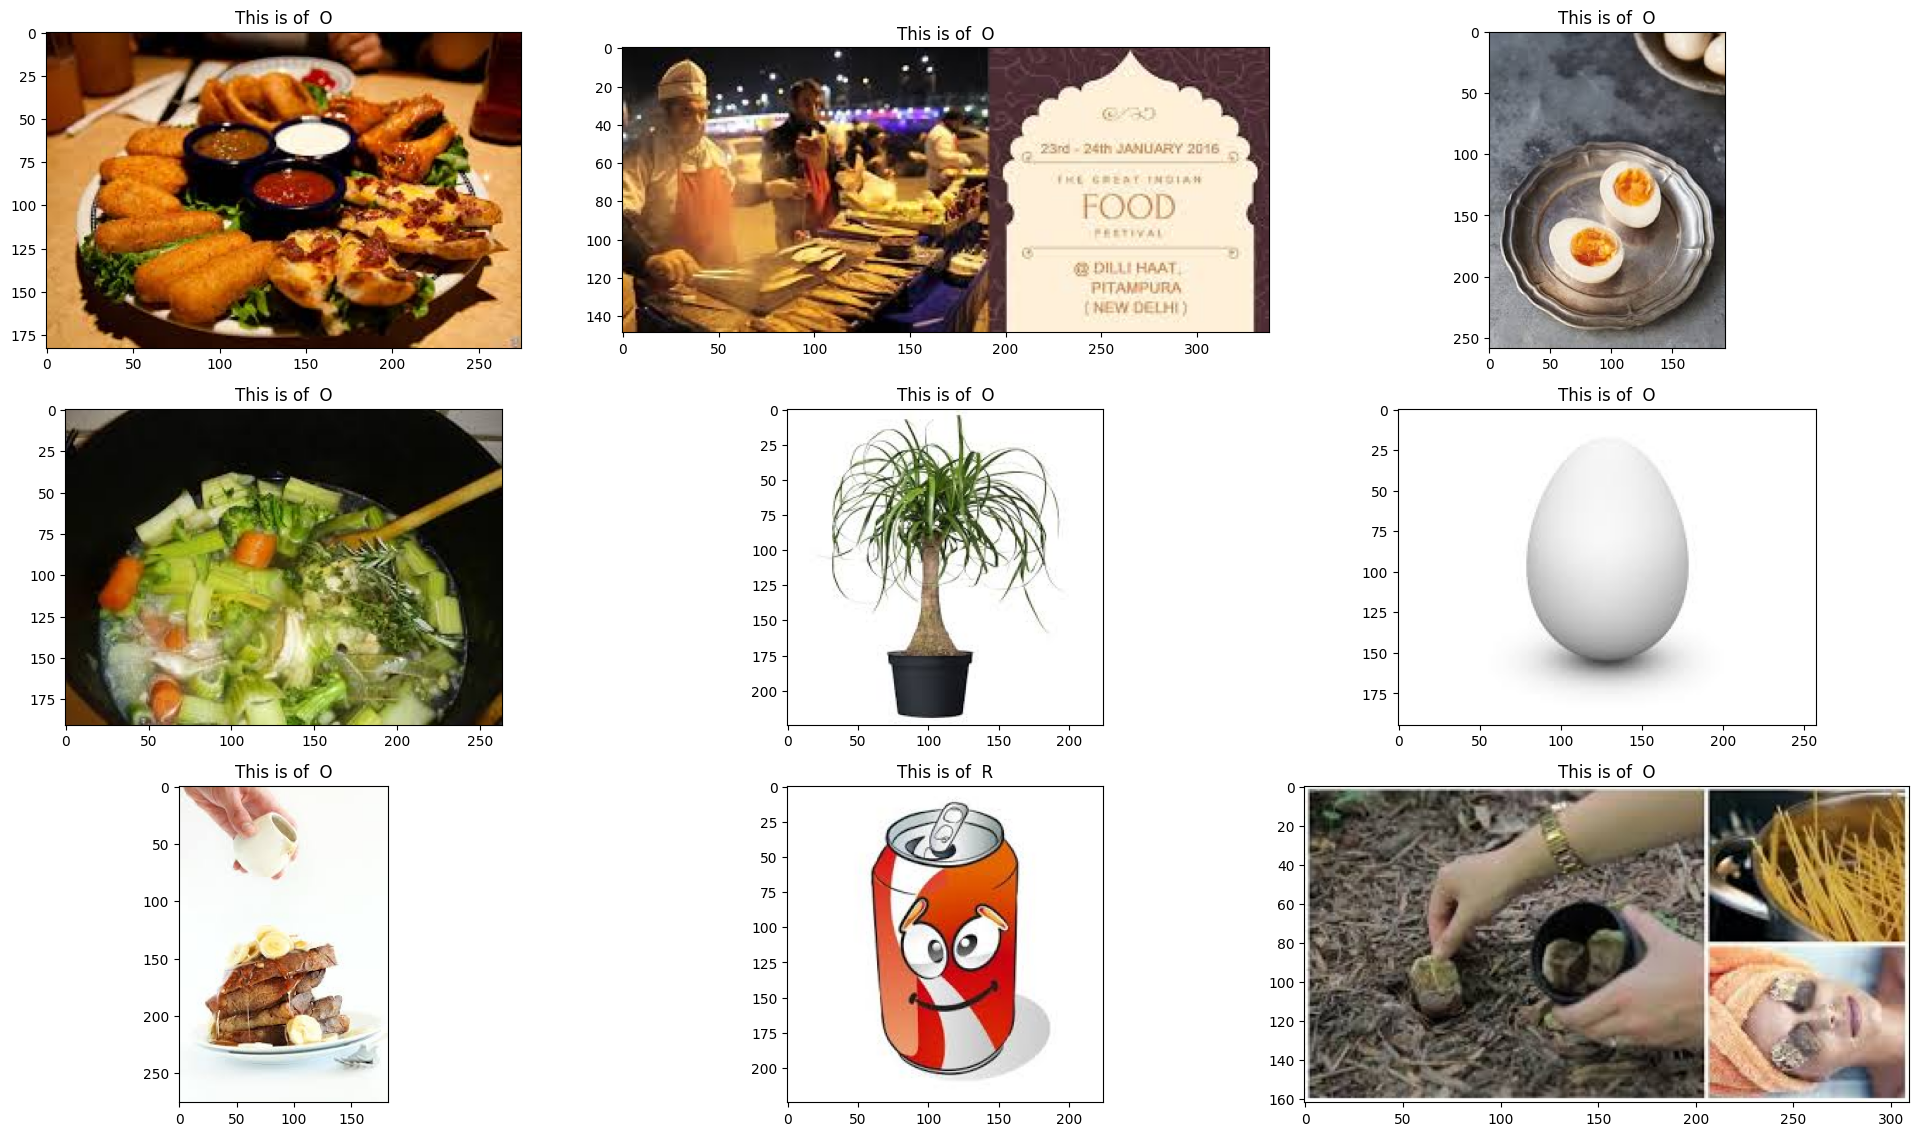

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of  {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [10]:
model = Sequential()

model.add(Conv2D(32,(3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
hist = model.fit(
    train_generator,
    epochs = 2,
    validation_data = test_generator
)

Epoch 1/2
353/353 ━━━━━━━━━━━━━━━━━━━━ 71s 171ms/step - accuracy: 0.7584 - loss: 0.5305 - val_accuracy: 0.8655 - val_loss: 0.3295
Epoch 2/2
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8426 - loss: 0.3852 - val_accuracy: 0.8910 - val_loss: 0.2650


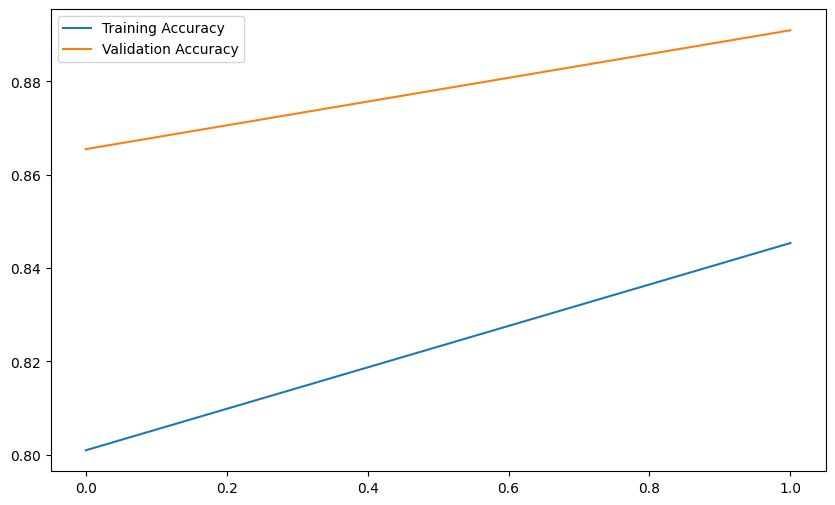

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

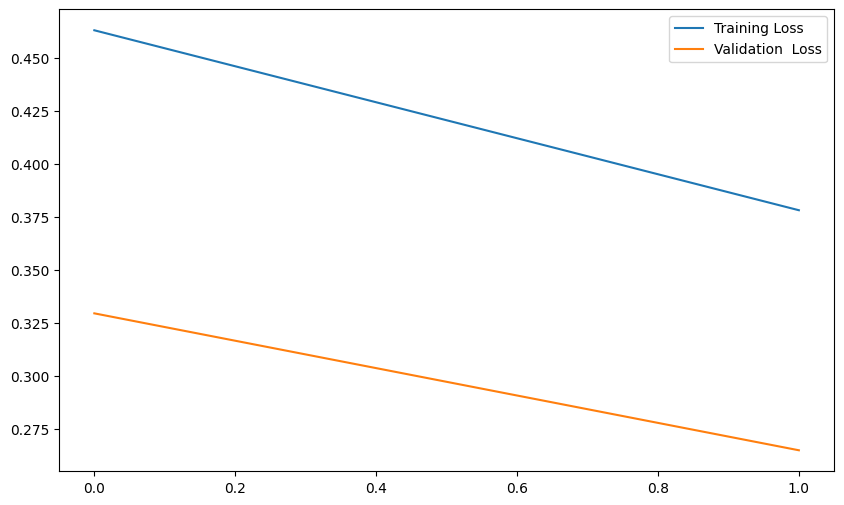

In [17]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label= 'Training Loss')
plt.plot(hist.history['val_loss'],label='Validation  Loss')
plt.legend()
plt.show()

In [18]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[-1,224,224,3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print("The Image Shown is Recyclable Waste")
    elif result == 1:
        print("The Image Shown is Organic Waste")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The Image Shown is Organic Waste


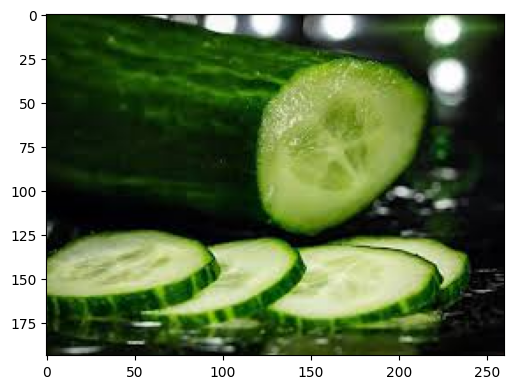

In [24]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_13732.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The Image Shown is Recyclable Waste


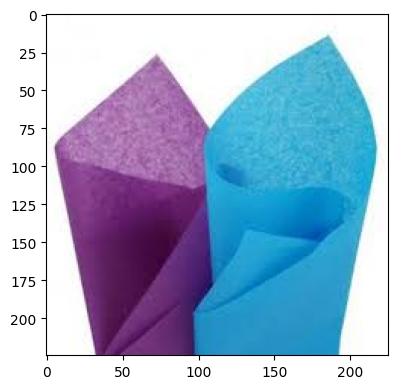

In [20]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg')
predict_func(test_img)